# **Практическая №11. Прогнозирование временных рядов, используя методы глубокого обучения**

# **Задание:**

## 1. Ознакомьтесь с библиотеками и их инструментарием

## 2. В контексте выбранного Вами набора данных, отберите несколько моделей глубокого обучения, обучите их на своих данных, после чего проведите сравнительный анализ.

## **Подготовка данных**

Загрузим датасет и подготовим данные для моделирования.

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

2025-01-17 01:24:34.379058: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-17 01:24:34.381444: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-17 01:24:34.387974: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-17 01:24:34.403137: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737066274.426440   14971 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737066274.43

In [6]:
df = pd.read_excel('datasets/API_SP.POP.TOTL_DS2_en_excel_v2_9.xls', header=3)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,106807.0,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,590968990.0,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,32792523.0,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,406992047.0,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,27160769.0,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0


In [7]:
df = df.drop(['Indicator Name', 'Indicator Code'], axis=1)
df

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,58694.0,58990.0,...,106807.0,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0
1,Africa Eastern and Southern,AFE,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,153281203.0,157704381.0,...,590968990.0,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0
2,Afghanistan,AFG,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,10266395.0,10505959.0,...,32792523.0,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0
3,Africa Western and Central,AFW,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,111246953.0,113795019.0,...,406992047.0,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0
4,Angola,AGO,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,5581386.0,5641807.0,...,27160769.0,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,984846.0,1011421.0,1036950.0,1062737.0,1090270.0,1120168.0,1152586.0,1187667.0,...,1812788.0,1788274.0,1777568.0,1791019.0,1797086.0,1788891.0,1790152.0,1786080.0,1768096.0,1756366.0
262,"Yemen, Rep.",YEM,5532301.0,5655232.0,5782221.0,5911135.0,6048006.0,6195593.0,6351494.0,6516444.0,...,30226309.0,31159379.0,32109010.0,33090921.0,34085182.0,35111408.0,36134863.0,37140230.0,38222876.0,39390799.0
263,South Africa,ZAF,16440172.0,16908035.0,17418522.0,17954564.0,18511361.0,19089380.0,19690087.0,20314066.0,...,55594838.0,56723537.0,57259551.0,57635162.0,58613001.0,59587885.0,60562381.0,61502603.0,62378410.0,63212384.0
264,Zambia,ZMB,3153729.0,3254086.0,3358099.0,3465907.0,3577017.0,3692086.0,3812003.0,3936343.0,...,15895315.0,16399089.0,16914423.0,17441320.0,17973569.0,18513839.0,19059395.0,19603607.0,20152938.0,20723965.0


In [8]:
id_vars = ['Country Code', 'Country Name'] if 'Country Name' in df.columns else ['Country Code']

# Преобразование данных
melted_df = pd.melt(
    df,
    id_vars=id_vars,           # Колонки, которые останутся без изменений
    var_name='Year',           # Название для новой колонки с годами
    value_name='Population'    # Название для новой колонки с численностью населения
)

# Преобразуем год в числовой формат (если года содержат только числа)
melted_df['Year'] = pd.to_numeric(melted_df['Year'], errors='coerce')

# Удаляем строки, где Year является NaN (если были некорректные данные)
melted_df = melted_df.dropna(subset=['Year'])

# Преобразуем Year в int
melted_df['Year'] = melted_df['Year'].astype(int)

# Сортировка по коду страны и году (опционально)
melted_df = melted_df.sort_values(by=['Country Code', 'Year']).reset_index(drop=True)

# Вывод результата
melted_df.head()

,Country Code,Country Name,Year,Population
0,ABW,Aruba,1960,54922.0
1,ABW,Aruba,1961,55578.0
2,ABW,Aruba,1962,56320.0
3,ABW,Aruba,1963,57002.0
4,ABW,Aruba,1964,57619.0


In [9]:
!pip install nbeats_keras==1.6.0 pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 6.2 MB/s eta 0:00:0000:0100:01


In [15]:
import pandas as pd
import numpy as np
from pandas_datareader import wb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
import plotly.express as px
from nbeats_keras.model import NBeatsNet
import pycountry
import warnings
warnings.filterwarnings('ignore')

# Преобразование года в целое число
melted_df['Year'] = melted_df['Year'].astype(int)

# Удаление строк с пропущенными значениями
melted_df.dropna(subset=['Country Code', 'Country Name', 'Year', 'Population'], inplace=True)

# Сортировка данных
melted_df.sort_values(['Country Name', 'Year'], inplace=True)
melted_df.reset_index(drop=True, inplace=True)

# Получение списка уникальных стран
countries = melted_df['Country Name'].unique()

# Выбираем индикатор для прогнозирования
indicator = 'Population'

# Параметры для моделирования
look_back = 5  # Используем последние 5 лет для прогнозирования
forecast_horizon = 5  # Прогнозируем на 5 лет вперед

# Создание словаря для хранения временных рядов по странам
country_series = {}

for country in countries:
    country_data = melted_df[melted_df['Country Name'] == country]
    series = country_data[indicator].values
    years = country_data['Year'].values
    if len(series) >= look_back + forecast_horizon:
        country_series[country] = {
            'series': series,
            'years': years
        }

# Подготовка данных для обучения моделей
X_data = []
Y_data = []
country_names = []
scalers = {}

for country in country_series.keys():
    data = country_series[country]['series']
    if len(data) < look_back + forecast_horizon:
        continue  # Пропускаем, если данных недостаточно
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data.reshape(-1, 1)).flatten()
    scalers[country] = scaler
    for i in range(len(data_scaled) - look_back - forecast_horizon + 1):
        X = data_scaled[i:i+look_back]
        Y = data_scaled[i+look_back:i+look_back+forecast_horizon]
        X_data.append(X)
        Y_data.append(Y)
        country_names.append(country)

X_data = np.array(X_data)
Y_data = np.array(Y_data)
country_names = np.array(country_names)

# Разделение на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test, train_countries, test_countries = train_test_split(
    X_data, Y_data, country_names, test_size=0.2, random_state=42)

# Изменение формы X для RNN [samples, time steps, features]
X_train_rnn = X_train.reshape((X_train.shape[0], look_back, 1))
X_test_rnn = X_test.reshape((X_test.shape[0], look_back, 1))

# Функция для обучения и предсказания модели
def train_and_predict_rnn(model_type, X_train, Y_train, X_test):
    model = Sequential()
    if model_type == 'RNN':
        model.add(SimpleRNN(64, input_shape=(look_back, 1)))
    elif model_type == 'LSTM':
        model.add(LSTM(64, input_shape=(look_back, 1)))
    elif model_type == 'GRU':
        model.add(GRU(64, input_shape=(look_back, 1)))
    model.add(Dense(forecast_horizon))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, Y_train, epochs=100, batch_size=16, verbose=0)
    predictions = model.predict(X_test)
    return model, predictions

# Обучение и предсказание моделей
model_rnn, Y_pred_rnn = train_and_predict_rnn('RNN', X_train_rnn, Y_train, X_test_rnn)
model_lstm, Y_pred_lstm = train_and_predict_rnn('LSTM', X_train_rnn, Y_train, X_test_rnn)
model_gru, Y_pred_gru = train_and_predict_rnn('GRU', X_train_rnn, Y_train, X_test_rnn)

# Модель N-BEATS
# Изменение формы входных данных для N-BEATS
X_train_nbeats = X_train.reshape((X_train.shape[0], look_back, 1))
X_test_nbeats = X_test.reshape((X_test.shape[0], look_back, 1))
Y_train_nbeats = Y_train.reshape(-1, forecast_horizon)
Y_test_nbeats = Y_test.reshape(-1, forecast_horizon)

2025-01-17 01:29:33.402950: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [17]:
!pip install nbeats-pytorch

  Using cached nbeats_pytorch-1.8.0-py3-none-any.whl (7.4 kB)
  Using cached protobuf-3.20.0-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.4 MB/s eta 0:00:0000:0100:10
  Using cached filelock-3.16.1-py3-none-any.whl (16 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 2.4 MB/s eta 0:00:0000:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 2.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:0000:0100:06
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 1.6 MB/s eta 

In [65]:
print(f"Тип данных X_train_nbeats: {X_train_nbeats.dtype}")
print(f"Тип данных Y_train_nbeats: {Y_train_nbeats.dtype}")
print(f"Тип данных X_test_nbeats: {X_test_nbeats.dtype}")

# Преобразование данных в float, если они являются строками
if X_train_nbeats.dtype == object:
    X_train_nbeats = X_train_nbeats.astype(np.float32)
if Y_train_nbeats.dtype == object:
    Y_train_nbeats = Y_train_nbeats.astype(np.float32)
if X_test_nbeats.dtype == object:
    X_test_nbeats = X_test_nbeats.astype(np.float32)

Тип данных X_train_nbeats: float64
Тип данных Y_train_nbeats: float64
Тип данных X_test_nbeats: float64


In [26]:
input_dim = X_train.shape[2]  # Количество признаков
backcast_length = look_back  # Длина истории
forecast_length = X_train.shape[2]  # Прогнозируем все признаки, а не одно значение
num_epochs = 5  # Для тестирования можно уменьшить количество эпох

# Создание упрощенной модели N-BEATS
model_nbeats = NBeatsNet(
    input_dim=input_dim,
    backcast_length=backcast_length,
    forecast_length=forecast_length,  # Прогнозируем все признаки
    stack_types=(NBeatsNet.GENERIC_BLOCK,),  # Один блок
    nb_blocks_per_stack=1,  # Уменьшаем количество блоков
    thetas_dim=(4,),  # Уменьшаем размер тета
    share_weights_in_stack=False,  # Упростим модель
    hidden_layer_units=16  # Уменьшаем количество нейронов
)

IndexError: tuple index out of range

In [25]:
from nbeats_keras.model import NBeatsNet
# Создание модели N-BEATS
model_nbeats = NBeatsNet(
    # input_dim=1,  # Количество признаков (у нас один показатель)
    backcast_length=look_back,
    forecast_length=forecast_horizon,
    stack_types=(NBeatsNet.GENERIC_BLOCK, NBeatsNet.GENERIC_BLOCK),
    nb_blocks_per_stack=2,
    thetas_dim=(128, 128),
    share_weights_in_stack=True,
    hidden_layer_units=256
)
model_nbeats.compile(loss='mse', optimizer='adam')

# Обучение модели N-BEATS
model_nbeats.fit(X_train_nbeats, Y_train_nbeats, epochs=100, batch_size=16)

# Прогнозирование моделью N-BEATS
Y_pred_nbeats = model_nbeats.predict(X_test_nbeats)

ValueError: Argument `name` must be a string and cannot contain character `/`. Received: name=0/0/generic/d1 (of type <class 'str'>)

In [ ]:
!pip install nbeats-pytorch

  Using cached nbeats_pytorch-1.8.0-py3-none-any.whl (7.4 kB)
  Using cached protobuf-3.20.0-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.4 MB/s eta 0:00:0000:0100:10
  Using cached filelock-3.16.1-py3-none-any.whl (16 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 2.4 MB/s eta 0:00:0000:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 2.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:0000:0100:06
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 1.6 MB/s eta 

In [ ]:
# Функция для обратного преобразования предсказаний
def inverse_transform(predictions, countries):
    results = []
    for i, pred in enumerate(predictions):
        country = countries[i]
        scaler = scalers[country]
        inv_pred = scaler.inverse_transform(pred.reshape(-1, 1)).flatten()
        results.append(inv_pred)
    return np.array(results)

# Обратное преобразование предсказаний
Y_pred_rnn_inv = inverse_transform(Y_pred_rnn, test_countries)
Y_pred_lstm_inv = inverse_transform(Y_pred_lstm, test_countries)
Y_pred_gru_inv = inverse_transform(Y_pred_gru, test_countries)
Y_pred_nbeats_inv = inverse_transform(Y_pred_nbeats, test_countries)
Y_test_inv = inverse_transform(Y_test, test_countries)

In [50]:
# Транспонирование данных
df_pivot = melted_df.pivot(index='Year', columns='Country Code', values='Population').fillna(0)
df_pivot

Country Code,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
Year,,,,,,,,,,,,,,,,,,,,,
1960,54922.0,130072080.0,9035043.0,97630925.0,5231654.0,1608800.0,9510.0,91540853.0,131334.0,20386045.0,...,32500.0,32531933.0,64431.0,3.021529e+09,112490.0,984846.0,5532301.0,16440172.0,3153729.0,3809389.0
1961,55578.0,133534923.0,9214083.0,99706674.0,5301583.0,1659800.0,10283.0,93931683.0,137989.0,20726276.0,...,34300.0,33409059.0,66264.0,3.062769e+09,115496.0,1011421.0,5655232.0,16908035.0,3254086.0,3930401.0
1962,56320.0,137171659.0,9404406.0,101854756.0,5354310.0,1711319.0,11086.0,96428599.0,144946.0,21072538.0,...,35000.0,34288560.0,68174.0,3.117373e+09,118597.0,1036950.0,5782221.0,17418522.0,3358099.0,4055959.0
1963,57002.0,140945536.0,9604487.0,104089175.0,5408320.0,1762621.0,11915.0,99038509.0,152211.0,21421705.0,...,39800.0,35249101.0,70159.0,3.184063e+09,121764.0,1062737.0,5911135.0,17954564.0,3465907.0,4185877.0
1964,57619.0,144904094.0,9814318.0,106388440.0,5464187.0,1814135.0,12764.0,101729760.0,159692.0,21769453.0,...,40800.0,36201563.0,72219.0,3.251253e+09,124894.0,1090270.0,6048006.0,18511361.0,3577017.0,4320006.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,109203.0,675950189.0,37856121.0,463365429.0,32375632.0,2854191.0,76474.0,444281315.0,9445785.0,44973465.0,...,106669.0,97173776.0,291985.0,7.776892e+09,209780.0,1788891.0,35111408.0,59587885.0,18513839.0,15271368.0
2020,108587.0,694446100.0,39068979.0,474569351.0,33451132.0,2837849.0,77380.0,453723239.0,9401038.0,45191965.0,...,106290.0,98079191.0,298858.0,7.856139e+09,211944.0,1790152.0,36134863.0,60562381.0,19059395.0,15526888.0
2021,107700.0,713090928.0,40000412.0,485920997.0,34532429.0,2811666.0,78364.0,460646603.0,9575152.0,45312281.0,...,105870.0,98935098.0,305868.0,7.921184e+09,213779.0,1786080.0,37140230.0,61502603.0,19603607.0,15797210.0


In [38]:
# Преобразование в numpy массив
data = df.values

In [39]:
# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [40]:
look_back = 4  # Количество предыдущих временных шагов для использования в качестве входных данных

# Преобразование данных в последовательности (X, Y)
def create_dataset(dataset, look_back):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        # Формирование последовательности входных данных длиной look_back
        X.append(dataset[i:i + look_back])
        # Целевое значение - следующий элемент после последовательности
        Y.append(dataset[i + look_back])
    return np.array(X), np.array(Y)

# Разбиение на обучающую и тестовую выборки
X, Y = create_dataset(data_scaled, look_back)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [41]:
print(X_train.shape, Y_train.shape)

(209, 4, 64) (209, 64)


## **1. Рекуррентная нейронная сеть (RNN)**

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
# Построение модели
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, input_shape=(look_back, X_train.shape[2]), activation='tanh'))
model_rnn.add(Dense(X_train.shape[2]))
model_rnn.compile(loss='mean_squared_error', optimizer='adam')

# Обучение модели
history = model_rnn.fit(
    X_train, Y_train,
    epochs=100,
    batch_size=15,
    validation_data=(X_test, Y_test),
    verbose=2
)

# Прогнозирование
train_predict_rnn = model_rnn.predict(X_train)
test_predict_rnn = model_rnn.predict(X_test)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 - 2s - 176ms/step - loss: nan - val_loss: nan
Epoch 2/100
14/14 - 0s - 21ms/step - loss: nan - val_loss: nan
Epoch 3/100
14/14 - 0s - 20ms/step - loss: nan - val_loss: nan
Epoch 4/100
14/14 - 0s - 11ms/step - loss: nan - val_loss: nan
Epoch 5/100
14/14 - 0s - 12ms/step - loss: nan - val_loss: nan
Epoch 6/100
14/14 - 0s - 10ms/step - loss: nan - val_loss: nan
Epoch 7/100
14/14 - 0s - 12ms/step - loss: nan - val_loss: nan
Epoch 8/100
14/14 - 0s - 11ms/step - loss: nan - val_loss: nan
Epoch 9/100
14/14 - 0s - 12ms/step - loss: nan - val_loss: nan
Epoch 10/100
14/14 - 0s - 22ms/step - loss: nan - val_loss: nan
Epoch 11/100
14/14 - 0s - 19ms/step - loss: nan - val_loss: nan
Epoch 12/100
14/14 - 0s - 9ms/step - loss: nan - val_loss: nan
Epoch 13/100
14/14 - 0s - 11ms/step - loss: nan - val_loss: nan
Epoch 14/100
14/14 - 0s - 10ms/step - loss: nan - val_loss: nan
Epoch 15/100
14/14 - 0s - 10ms/step - loss: nan - val_loss: nan
Epoch 16/100
14/14 - 0s - 9ms/step - loss: nan - val_loss: na

1/7 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


1. **Вычисление метрики RMSE**:


  - **RMSE (корень из среднеквадратичной ошибки)** оценивает среднее отклонение прогнозов от истинных значений.

In [43]:
# Возвращение данных в исходный масштаб
train_predict_rnn = scaler.inverse_transform(train_predict_rnn)
Y_train_actual_rnn = scaler.inverse_transform(Y_train)
test_predict_rnn = scaler.inverse_transform(test_predict_rnn)
Y_test_actual_rnn = scaler.inverse_transform(Y_test)

In [44]:
# Вычисление RMSE
from sklearn.metrics import mean_squared_error

train_score_rnn = np.sqrt(mean_squared_error(Y_train_actual_rnn, train_predict_rnn))
test_score_rnn = np.sqrt(mean_squared_error(Y_test_actual_rnn, test_predict_rnn))
print(f'RMSE на обучающем наборе: {train_score_rnn:.2f}')
print(f'RMSE на тестовом наборе: {test_score_rnn:.2f}')

ValueError: Input contains NaN.

2. **Построение графика потерь во время обучения**:

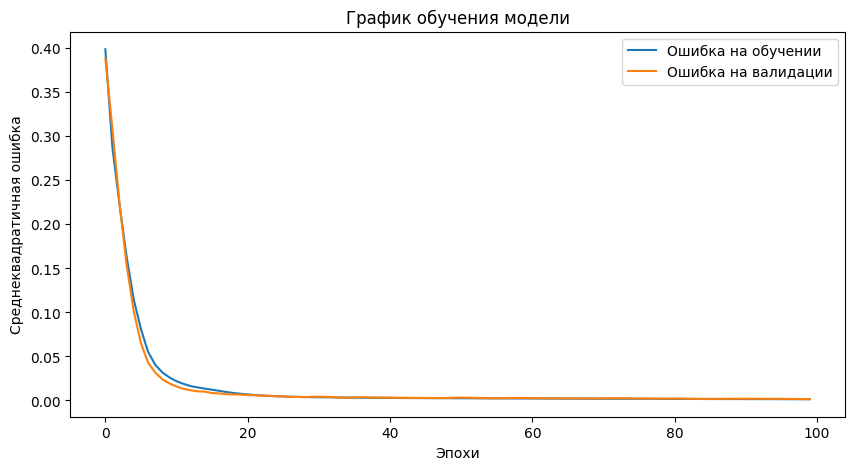

In [24]:
# Построение графика потерь
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Ошибка на обучении')
plt.plot(history.history['val_loss'], label='Ошибка на валидации')
plt.title('График обучения модели')
plt.xlabel('Эпохи')
plt.ylabel('Среднеквадратичная ошибка')
plt.legend()
plt.show()

3. **Построение графика результатов моделирования**:

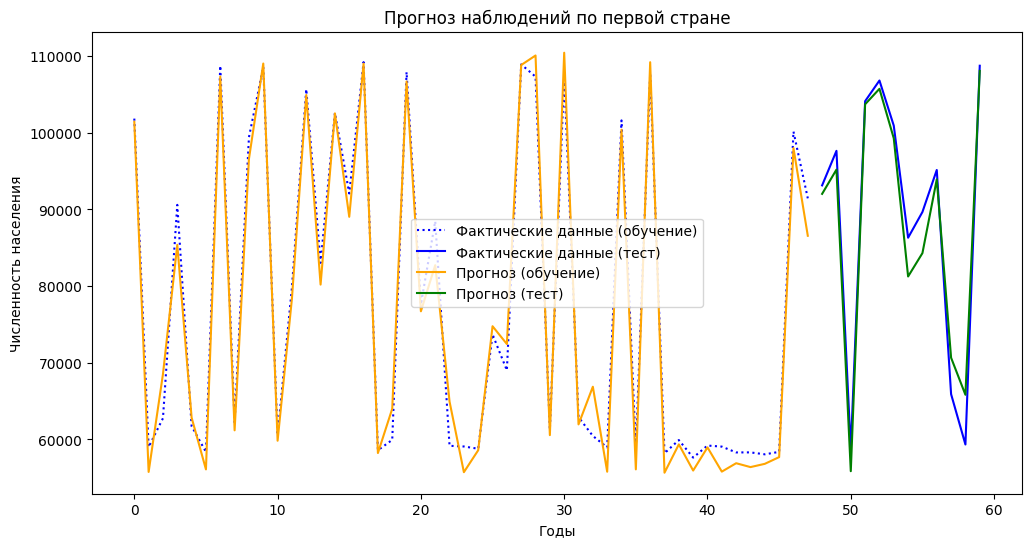

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(Y_train_actual_rnn)), Y_train_actual_rnn[:, 0], label='Фактические данные (обучение)', color='blue', linestyle='dotted')
plt.plot(np.arange(len(Y_train_actual_rnn), len(Y_train_actual_rnn) + len(Y_test_actual_rnn)), Y_test_actual_rnn[:, 0], label='Фактические данные (тест)', color='blue')
plt.plot(np.arange(len(train_predict_rnn)), train_predict_rnn[:, 0], label='Прогноз (обучение)', color='orange')
plt.plot(np.arange(len(Y_train_actual_rnn), len(Y_train_actual_rnn) + len(test_predict_rnn)), test_predict_rnn[:, 0], label='Прогноз (тест)', color='green')
plt.title('Прогноз наблюдений по первой стране')
plt.xlabel('Годы')
plt.ylabel('Численность населения')
plt.legend()
plt.show()

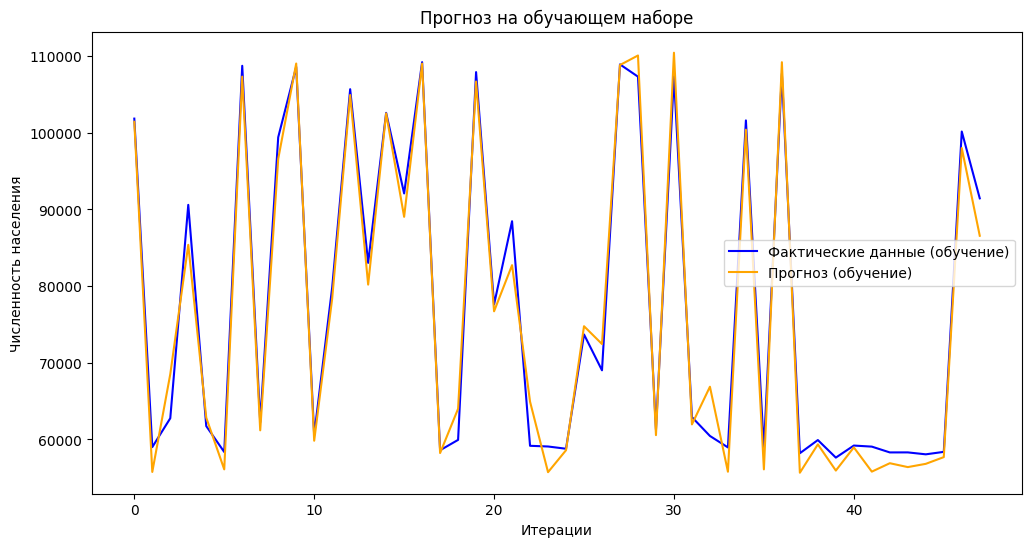

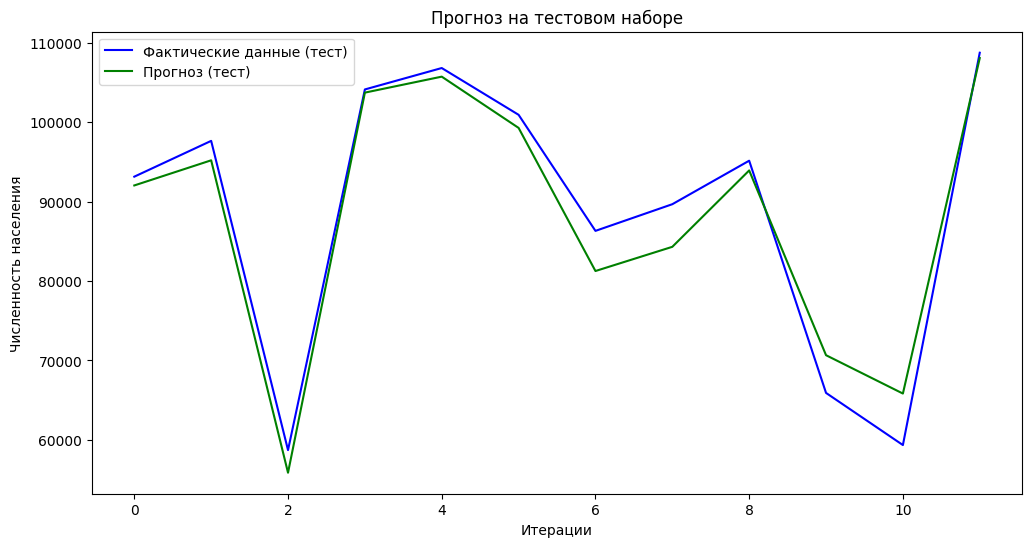

In [30]:
# Визуализация результатов на обучающем наборе
plt.figure(figsize=(12, 6))
plt.plot(Y_train_actual_rnn[:, 0], label='Фактические данные (обучение)', color='blue')
plt.plot(train_predict_rnn[:, 0], label='Прогноз (обучение)', color='orange')
plt.title('Прогноз на обучающем наборе')
plt.xlabel('Итерации')
plt.ylabel('Численность населения')
plt.legend()
plt.show()

# Визуализация результатов на тестовом наборе
plt.figure(figsize=(12, 6))
plt.plot(Y_test_actual_rnn[:, 0], label='Фактические данные (тест)', color='blue')
plt.plot(test_predict_rnn[:, 0], label='Прогноз (тест)', color='green')
plt.title('Прогноз на тестовом наборе')
plt.xlabel('Итерации')
plt.ylabel('Численность населения')
plt.legend()
plt.show()

## **2. Долгая краткосрочная память (LSTM)**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Создание модели
model_lstm = Sequential()
model_lstm.add(LSTM(100, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(25))
model_lstm.add(Dense(X_train.shape[2]))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')

# Обучение модели
history_lstm = model_lstm.fit(
    X_train, Y_train,
    epochs=100,
    batch_size=15,
    validation_data=(X_test, Y_test),
    verbose=2
)

# Прогнозирование
train_predict_lstm = model_lstm.predict(X_train)
test_predict_lstm = model_lstm.predict(X_test)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 7s - 2s/step - loss: 0.3272 - val_loss: 0.4045
Epoch 2/100
4/4 - 1s - 132ms/step - loss: 0.3032 - val_loss: 0.3655
Epoch 3/100
4/4 - 0s - 47ms/step - loss: 0.2715 - val_loss: 0.3123
Epoch 4/100
4/4 - 0s - 46ms/step - loss: 0.2326 - val_loss: 0.2508
Epoch 5/100
4/4 - 0s - 44ms/step - loss: 0.1903 - val_loss: 0.1899
Epoch 6/100
4/4 - 0s - 28ms/step - loss: 0.1527 - val_loss: 0.1382
Epoch 7/100
4/4 - 0s - 36ms/step - loss: 0.1225 - val_loss: 0.0984
Epoch 8/100
4/4 - 0s - 24ms/step - loss: 0.0948 - val_loss: 0.0696
Epoch 9/100
4/4 - 0s - 28ms/step - loss: 0.0676 - val_loss: 0.0490
Epoch 10/100
4/4 - 0s - 26ms/step - loss: 0.0512 - val_loss: 0.0361
Epoch 11/100
4/4 - 0s - 27ms/step - loss: 0.0408 - val_loss: 0.0303
Epoch 12/100
4/4 - 0s - 30ms/step - loss: 0.0335 - val_loss: 0.0228
Epoch 13/100
4/4 - 0s - 20ms/step - loss: 0.0299 - val_loss: 0.0217
Epoch 14/100
4/4 - 0s - 28ms/step - loss: 0.0264 - val_loss: 0.0167
Epoch 15/100
4/4 - 0s - 28ms/step - loss: 0.0244 - val_loss: 0.0155
Ep

In [32]:
# Возвращение данных в исходный масштаб
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
Y_train_actual_lstm = scaler.inverse_transform(Y_train)
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
Y_test_actual_lstm = scaler.inverse_transform(Y_test)

# Вычисление RMSE
train_score_lstm = np.sqrt(mean_squared_error(Y_train_actual_lstm, train_predict_lstm))
test_score_lstm = np.sqrt(mean_squared_error(Y_test_actual_lstm, test_predict_lstm))
print(f'RMSE на обучающем наборе: {train_score_lstm:.2f}')
print(f'RMSE на тестовом наборе: {test_score_lstm:.2f}')

RMSE на обучающем наборе: 12450688.67
RMSE на тестовом наборе: 13836976.84
